In [10]:
import keras        
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
import shutil 
import math
import cv2
import os

-----------請輸入你的train、val資料位置、類別總數、訓練次數(num_epoch)、測試圖片-----------

In [11]:
train_path = r'C:\AI\data_2\train'
val_path = r'C:\AI\data_2\val'
test_image_path = r'C:\AI\data_2\val\nike\1.jpg' # 測試圖片
num_classes = 2 # change to your number of class    
num_epoch = 60

------------------------------------cell1 end-----------------------------------------

In [12]:
batch_size = 5  # for train & val. modify according to your GPU memory and data
img_height = img_width = 224  # picture size (imagenet challenge)
channel = 3  # RGB=3, grayscale=1
seed = random.randint(0, 100)  # use for shuffle=True (not recommend, shuffle will be bad for debugging)

In [13]:
def data_generater(path, img_width, img_height):
    data_gen_args = dict(rescale=1./255,
                         rotation_range=5,
                         shear_range=0.2,
                         zoom_range=0.2,
                         vertical_flip=True,
                         horizontal_flip=True)
    # train data generator
    train_datagen = keras.preprocessing.image.ImageDataGenerator(**data_gen_args)

    data = train_datagen.flow_from_directory(
            path,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical',
            color_mode='rgb',
            shuffle=True)
    return data
    

In [14]:
train_generator = data_generater(train_path, img_width, img_height)
val_generator = data_generater(val_path, img_width, img_height)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


------------------請依照你的想法修改模型------------------

In [18]:
model = layers.Input(shape=(224, 224, 3))
x = layers.Flatten()(model)                        # 將圖片攤平
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(2, activation='softmax')(x)                      # 注意:最後一層要為你的類別數 

network = keras.Model(inputs=model, outputs=x)

network.compile(optimizer='SGD',     # 可改成 'SGD' adam
               loss='categorical_crossentropy',
               metrics=['accuracy'])


--------------------------------cell2 end------------------------------------

In [19]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = val_generator.n//val_generator.batch_size

history = network.fit_generator(generator=train_generator,
                                     steps_per_epoch=STEP_SIZE_TRAIN,
                                     validation_data=val_generator,
                                     validation_steps=STEP_SIZE_VALID,
                                     epochs=num_epoch,
                                     initial_epoch=0,
                                     verbose=1,  #显示方式
                                     workers=1)


Epoch 1/60
8/8 [==============================] - 2s 191ms/step - loss: 0.7113 - accuracy: 0.4000 - val_loss: 0.6964 - val_accuracy: 0.5500
Epoch 2/60
8/8 [==============================] - 1s 179ms/step - loss: 0.7079 - accuracy: 0.5750 - val_loss: 0.7243 - val_accuracy: 0.5000
Epoch 3/60
8/8 [==============================] - 2s 215ms/step - loss: 0.7164 - accuracy: 0.3250 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 4/60
8/8 [==============================] - 2s 209ms/step - loss: 0.6979 - accuracy: 0.4500 - val_loss: 0.6865 - val_accuracy: 0.5500
Epoch 5/60
8/8 [==============================] - 1s 187ms/step - loss: 0.7046 - accuracy: 0.3750 - val_loss: 0.7060 - val_accuracy: 0.5000
Epoch 6/60
8/8 [==============================] - 2s 192ms/step - loss: 0.6932 - accuracy: 0.5250 - val_loss: 0.7078 - val_accuracy: 0.5000
Epoch 7/60
8/8 [==============================] - 2s 211ms/step - loss: 0.7087 - accuracy: 0.4250 - val_loss: 0.7655 - val_accuracy: 0.5000
Epoch 8/60
8/8 [====

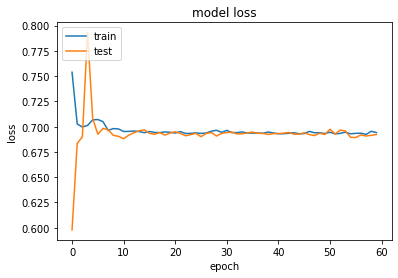

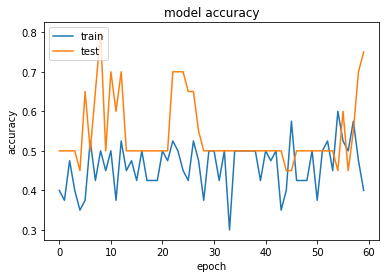

In [17]:
# plot model loss & save
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('VGG16_custom_model_loss_summary_graph.png')
plt.show()


# plot model accuracy & save
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('VGG16_custom_model_accuracy_summary_graph.png')
plt.show()

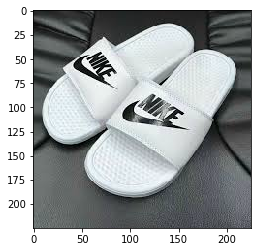

Predict this image as "nike"

The probability that this is a adidas is: 0.49547562

The probability that this is a nike is: 0.50452441



In [9]:
def preprocess_image(path=test_image_path):
    img = Image.open(path)
    img = img.resize((img_height, img_width), Image.BICUBIC)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    x = np.asarray(img)   # object to ndarray
    x = x / 255.
    batch_x = np.asarray([x])   # create for a batch [1, img_width, img_height, channel]
    return batch_x


img = preprocess_image(test_image_path)
mth2_predicted = network.predict(img)
mth2_index = np.argmax(mth2_predicted[0], axis=0)
mth2_predicted_answer = list(train_generator.class_indices.keys())[mth2_index]   # get the class name you predicted



img_bgr = cv2.imread(test_image_path)
img_rgb = img_bgr[:,:,:]
#print(img_bgr)
plt.imshow(img_bgr)
plt.show()


print('Predict this image as \"{}\"\n'.format(mth2_predicted_answer))
for label in range(len(train_generator.class_indices)):
    print('The probability that this is a {} is: {:.8f}\n'.format(list(train_generator.class_indices.keys())[label],
                                                                  mth2_predicted[0][label]))